# Double Pendulum Simulation

The first problem of the final homework for physics 5300.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt
from IPython.display import Image

The picture for the double pendulum is from the Wikipedia article and I will use this picture to set the conventions and notations. For Cartesian axes, I will take the origin where the pendulum is attached to the ceiling and choose $\hat{x}$ pointing to the right and $\hat{y}$ pointing down.

In [3]:
Image(url='https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Double-Pendulum.svg/170px-Double-Pendulum.svg.png')

In [4]:
class DoublePendulum():
    """
    DoublePendulum class implements the parameters and Lagrange's equations for 
     a simple double pendulum (no driving or damping).
     
    Parameters
    ----------
    L1 : float
        length of the first pendulum
    L2 : float
        length of the second pendulum
    m1 : float
        mass of the first pendulum
    m2 : float
        mass of the second pendulum
    g : float
        gravitational acceleration at the earth's surface

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1., L2=1., m1=1., m2=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = m1
        self.m2 = m2
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dtheta1/dt dtheta1_dot/dt dtheta2/dt dtheta2_dot/dt]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with 
            y[0] = theta1 and y[1] = theta1_dot
            y[2] = theta2 and y[3] = theta2_dot
            
        Returns
        -------
        
        """
        theta1, z1, theta2, z2 = y
        
        c, s = np.cos(theta1 - theta2), np.sin(theta1 - theta2)
        deno = (self.m1 + self.m2 * s**2)
        
        theta1_dot = z1
        z1_dot = (self.m2 * self.g * np.sin(theta2) * c \
                  - self.m2 * s * (self.L1 * z1**2 * c + self.L2 * z2**2) \
                  - (self.m1 + self.m2) * self.g * np.sin(theta1)) / self.L1 / deno
        theta2_dot = z2
        z2_dot = ( (self.m1 + self.m2) * (self.L1 * z1**2 * s \
                    - self.g * np.sin(theta2) + self.g * np.sin(theta1) * c) \
                    + self.m2 * self.L2 * z2**2 * s * c) / self.L2 / deno
        return theta1_dot, z1_dot, theta2_dot, z2_dot
    
    def solve_ode(self, t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, 
                  abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        theta1, theta1_dot, theta2, theta2_dot = solution.y

        return theta1, theta1_dot, theta2, theta2_dot
    
    def calc_E(y):
        """
        Return the total erengy of the system.
        """
        th1, th1d, th2, th2d = y.T
        V = -(m1 + m2) * L1 * g * np.cos(th1) - m2 * L2 * g * np.cos(th2)
        T = 0.5 * m1 * (L1 * th1d)**2 + 0.5 * m2 * ((L1 * th1d)**2 + (L2 * th2d)**2 + 2 * L1 * L2 * th1d * th2d * np.cos(th1 - th2))
        return V + T

In [5]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [6]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [7]:
# Labels for individual plot axes
theta_vs_time_labels = (r'$t$', r'$\theta$')
theta_dot_vs_time_labels = (r'$t$', r'$d\theta/dt(t)$')
state_space_labels = (r'$\theta$', r'$d\theta/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
m1 = 1.
m2 = 1.
g = 1.

# Instantiate a double pendulum 
dp1 = DoublePendulum(L1=L1, L2=L2, m1=m1, m2=m2, g=g)

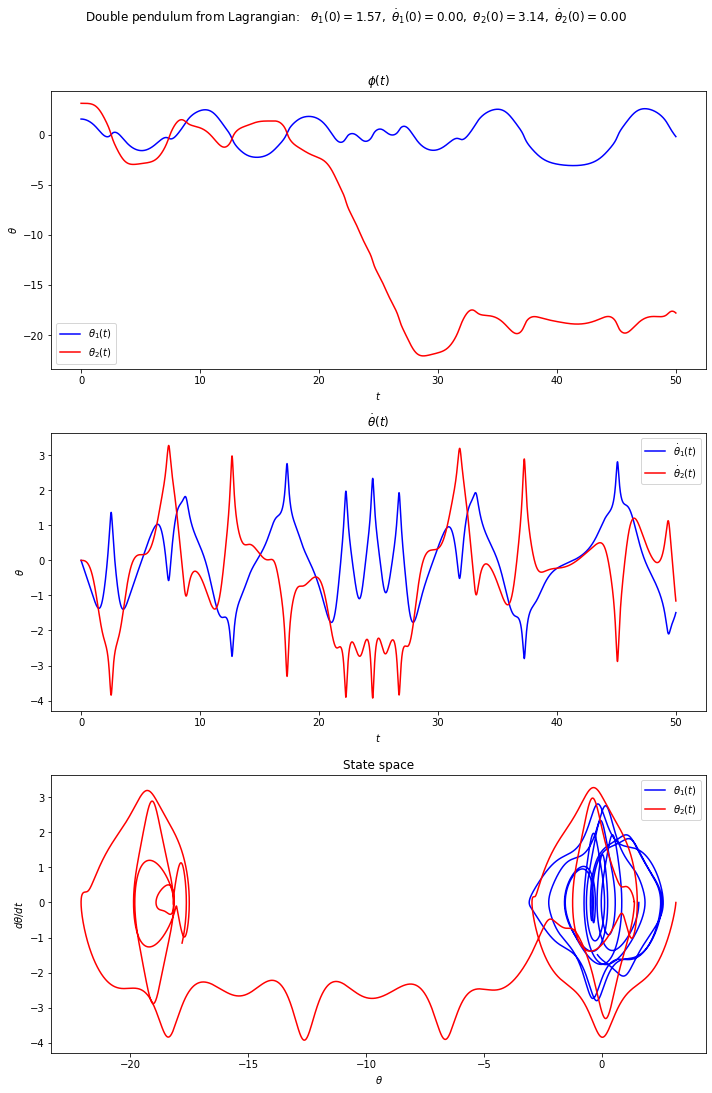

In [8]:
theta1_0 = np.pi / 2.
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 = 0.

theta1, theta1_dot, theta2, theta2_dot = dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)

# start the plot!
fig = plt.figure(figsize=(10,15))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: theta plot 
ax_a = fig.add_subplot(3,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], theta1[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=r'$\theta_1(t)$',
            title=r'$\phi(t)$', 
            ax=ax_a)    
plot_y_vs_x(t_pts[start : stop], theta2[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label=r'$\theta_2(t)$', 
            title=r'$\phi(t)$', 
            ax=ax_a)    
                              
# second plot: theta_dot plot 
ax_b = fig.add_subplot(3,1,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], theta1_dot[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=r'$\dot\theta_1(t)$', 
            title=r'$\dot\theta(t)$', 
            ax=ax_b)    
plot_y_vs_x(t_pts[start : stop], theta2_dot[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label=r'$\dot\theta_2(t)$', 
            title=r'$\dot\theta(t)$', 
            ax=ax_b)

# third plot: state space plot from t=30 to t=50   
ax_c = fig.add_subplot(3,1,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(theta1[start : stop], theta1_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=r'$\theta_1(t)$', 
            title='State space', 
            ax=ax_c)    
plot_y_vs_x(theta2[start : stop], theta2_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=r'$\theta_2(t)$', 
            title='State space', 
            ax=ax_c) 

fig.tight_layout()
fig.savefig('double_pendulum_Lagrange.png', bbox_inches='tight')  

# Test for chaos

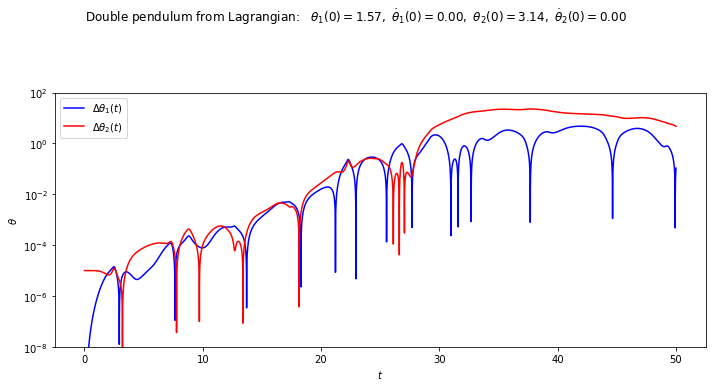

In [9]:
theta1b, theta1b_dot, theta2b, theta2b_dot = dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0-0.00001, theta2_dot_0)

# start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], np.abs(theta1[start : stop] - theta1b[start : stop]), 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            semilogy=True,
            label=r'$\Delta\theta_1(t)$', 
            ax=ax_a)    
plot_y_vs_x(t_pts[start : stop], np.abs(theta2[start : stop] - theta2b[start : stop]), 
            axis_labels=theta_vs_time_labels, 
            color='red',
            semilogy=True,
            label=r'$\Delta\theta_2(t)$', 
            ax=ax_a)    

ax_a.set_ylim(1.e-8, 1.e+2)

fig.tight_layout()
fig.savefig('double_pendulum_Lagrange_2.png', bbox_inches='tight')  

Chaotic systems exhibit what is called sensitive dependence on initial conditions. Hence based on the plot above, we can tell the system is chaotic.

# Animation

In [10]:
from matplotlib import animation, rc
from IPython.display import HTML

In [11]:
def xy_coords(x0, y0, theta, L):
    """
    Convert angle theta and pendulum length L to the bob position with respect to (x0, y0).
    """
    x = x0 + L * np.sin(theta)
    y = y0 - L * np.cos(theta)
    return x, y

In [13]:
%%capture
x_min = -3.2
x_max = -x_min
y_min = -3.2
y_max = -y_min

fig_anim = plt.figure(figsize=(5,5), num='Double pendulum')
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(x_min, x_max)
ax_anim.set_ylim(y_min, y_max)

# By assigning the first return from plot to line_anim, we can later change
#  the values in the line.
x0, y0 = 0., 0.
pt0_anim, = ax_anim.plot(x0, y0,
                        'o', markersize=6,
                        color='black')

x1, y1 = xy_coords(x0, y0, theta1[0], dp1.L1)
pt1_anim, = ax_anim.plot(x1, y1,
                        'o', markersize=12,
                        color='blue')
ln1_anim, = ax_anim.plot([x0, x1], [y0, y1], color='blue', lw=3)

x2, y2 = xy_coords(x1, y1, theta2[0], dp1.L2)
pt2_anim, = ax_anim.plot(x2, y2,
                        'o', markersize=12,
                        color='blue')
ln2_anim, = ax_anim.plot([x1, x2], [y1, y2], color='blue', lw=3)

x1b, y1b = xy_coords(x0, y0, theta1b[0], dp1.L1)
pt1b_anim, = ax_anim.plot(x1b, y1b,
                         'o', markersize=12,
                         color='red')
ln1b_anim, = ax_anim.plot([x0, x1b], [y0, y1b], color='red', lw=3)

x2b, y2b = xy_coords(x1b, y1b, theta2b[0], dp1.L2)
pt2b_anim, = ax_anim.plot(x2b, y2b,
                         'o', markersize=12,
                         color='red')
ln2b_anim, = ax_anim.plot([x1b, x2b], [y1b, y2b], color='red', lw=3)

ax_anim.set_aspect(1)
ax_anim.axis('off')
fig_anim.tight_layout()

In [14]:
def animate_pendulum(i):
    """
    This is the function to create each frame numbered by i.
    """
    i_skip = 2 * i
    
    x0, y0 = 0., 0.
    pt0_anim.set_data(x0, y0)
    
    x1, y1 = xy_coords(x0, y0, theta1[i_skip], dp1.L1)
    pt1_anim.set_data(x1, y1)
    ln1_anim.set_data([x0, x1], [y0, y1])
    x2, y2 = xy_coords(x1, y1, theta2[i_skip], dp1.L2)
    pt2_anim.set_data(x2, y2)
    ln2_anim.set_data([x1, x2], [y1, y2])
    
    x1b, y1b = xy_coords(x0, y0, theta1b[i_skip], dp1.L1)
    pt1b_anim.set_data(x1b, y1b)
    ln1b_anim.set_data([x0, x1b], [y0, y1b])
    x2b, y2b = xy_coords(x1b, y1b, theta2b[i_skip], dp1.L2)
    pt2b_anim.set_data(x2b, y2b)
    ln2b_anim.set_data([x1b, x2b], [y1b, y2b])
    
    return (pt0_anim, pt1_anim, ln1_anim, pt2_anim, ln2_anim,
           pt1b_anim, ln1b_anim, pt2b_anim, ln2b_anim)

In [15]:
frame_interval = 20.  # time between frames
frame_number = 1000    # number of frames to include (index of t_pts)
anim = animation.FuncAnimation(fig_anim, 
                               animate_pendulum, 
                               init_func=None,
                               frames=frame_number, 
                               interval=frame_interval, 
                               blit=True,
                               repeat=False)

In [16]:
HTML(anim.to_jshtml())